In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler    
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import feature_selection
from sklearn.ensemble import RandomForestClassifier


In [91]:
data=pd.read_csv('S:/Sem 3/Multivariate Statistics/Assignments/Final project/surface_faults.csv')
data.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
#data[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]

In [93]:
X=data.drop(data[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']], axis=1)
# y_col= data[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]
y=(data.iloc[:,-7:]==1).idxmax(1)
y.shape
X.shape


(1941, 27)

In [94]:
# sns.pairplot(data,x_vars=X,
#     y_vars=y)
data_new=data.drop(data[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']], axis=1)
le=LabelEncoder()
data_new['defect_type']=le.fit_transform(y)
data_new

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,defect_type
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,4
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,4
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,4
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,4
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,3
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,3
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,3
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,3


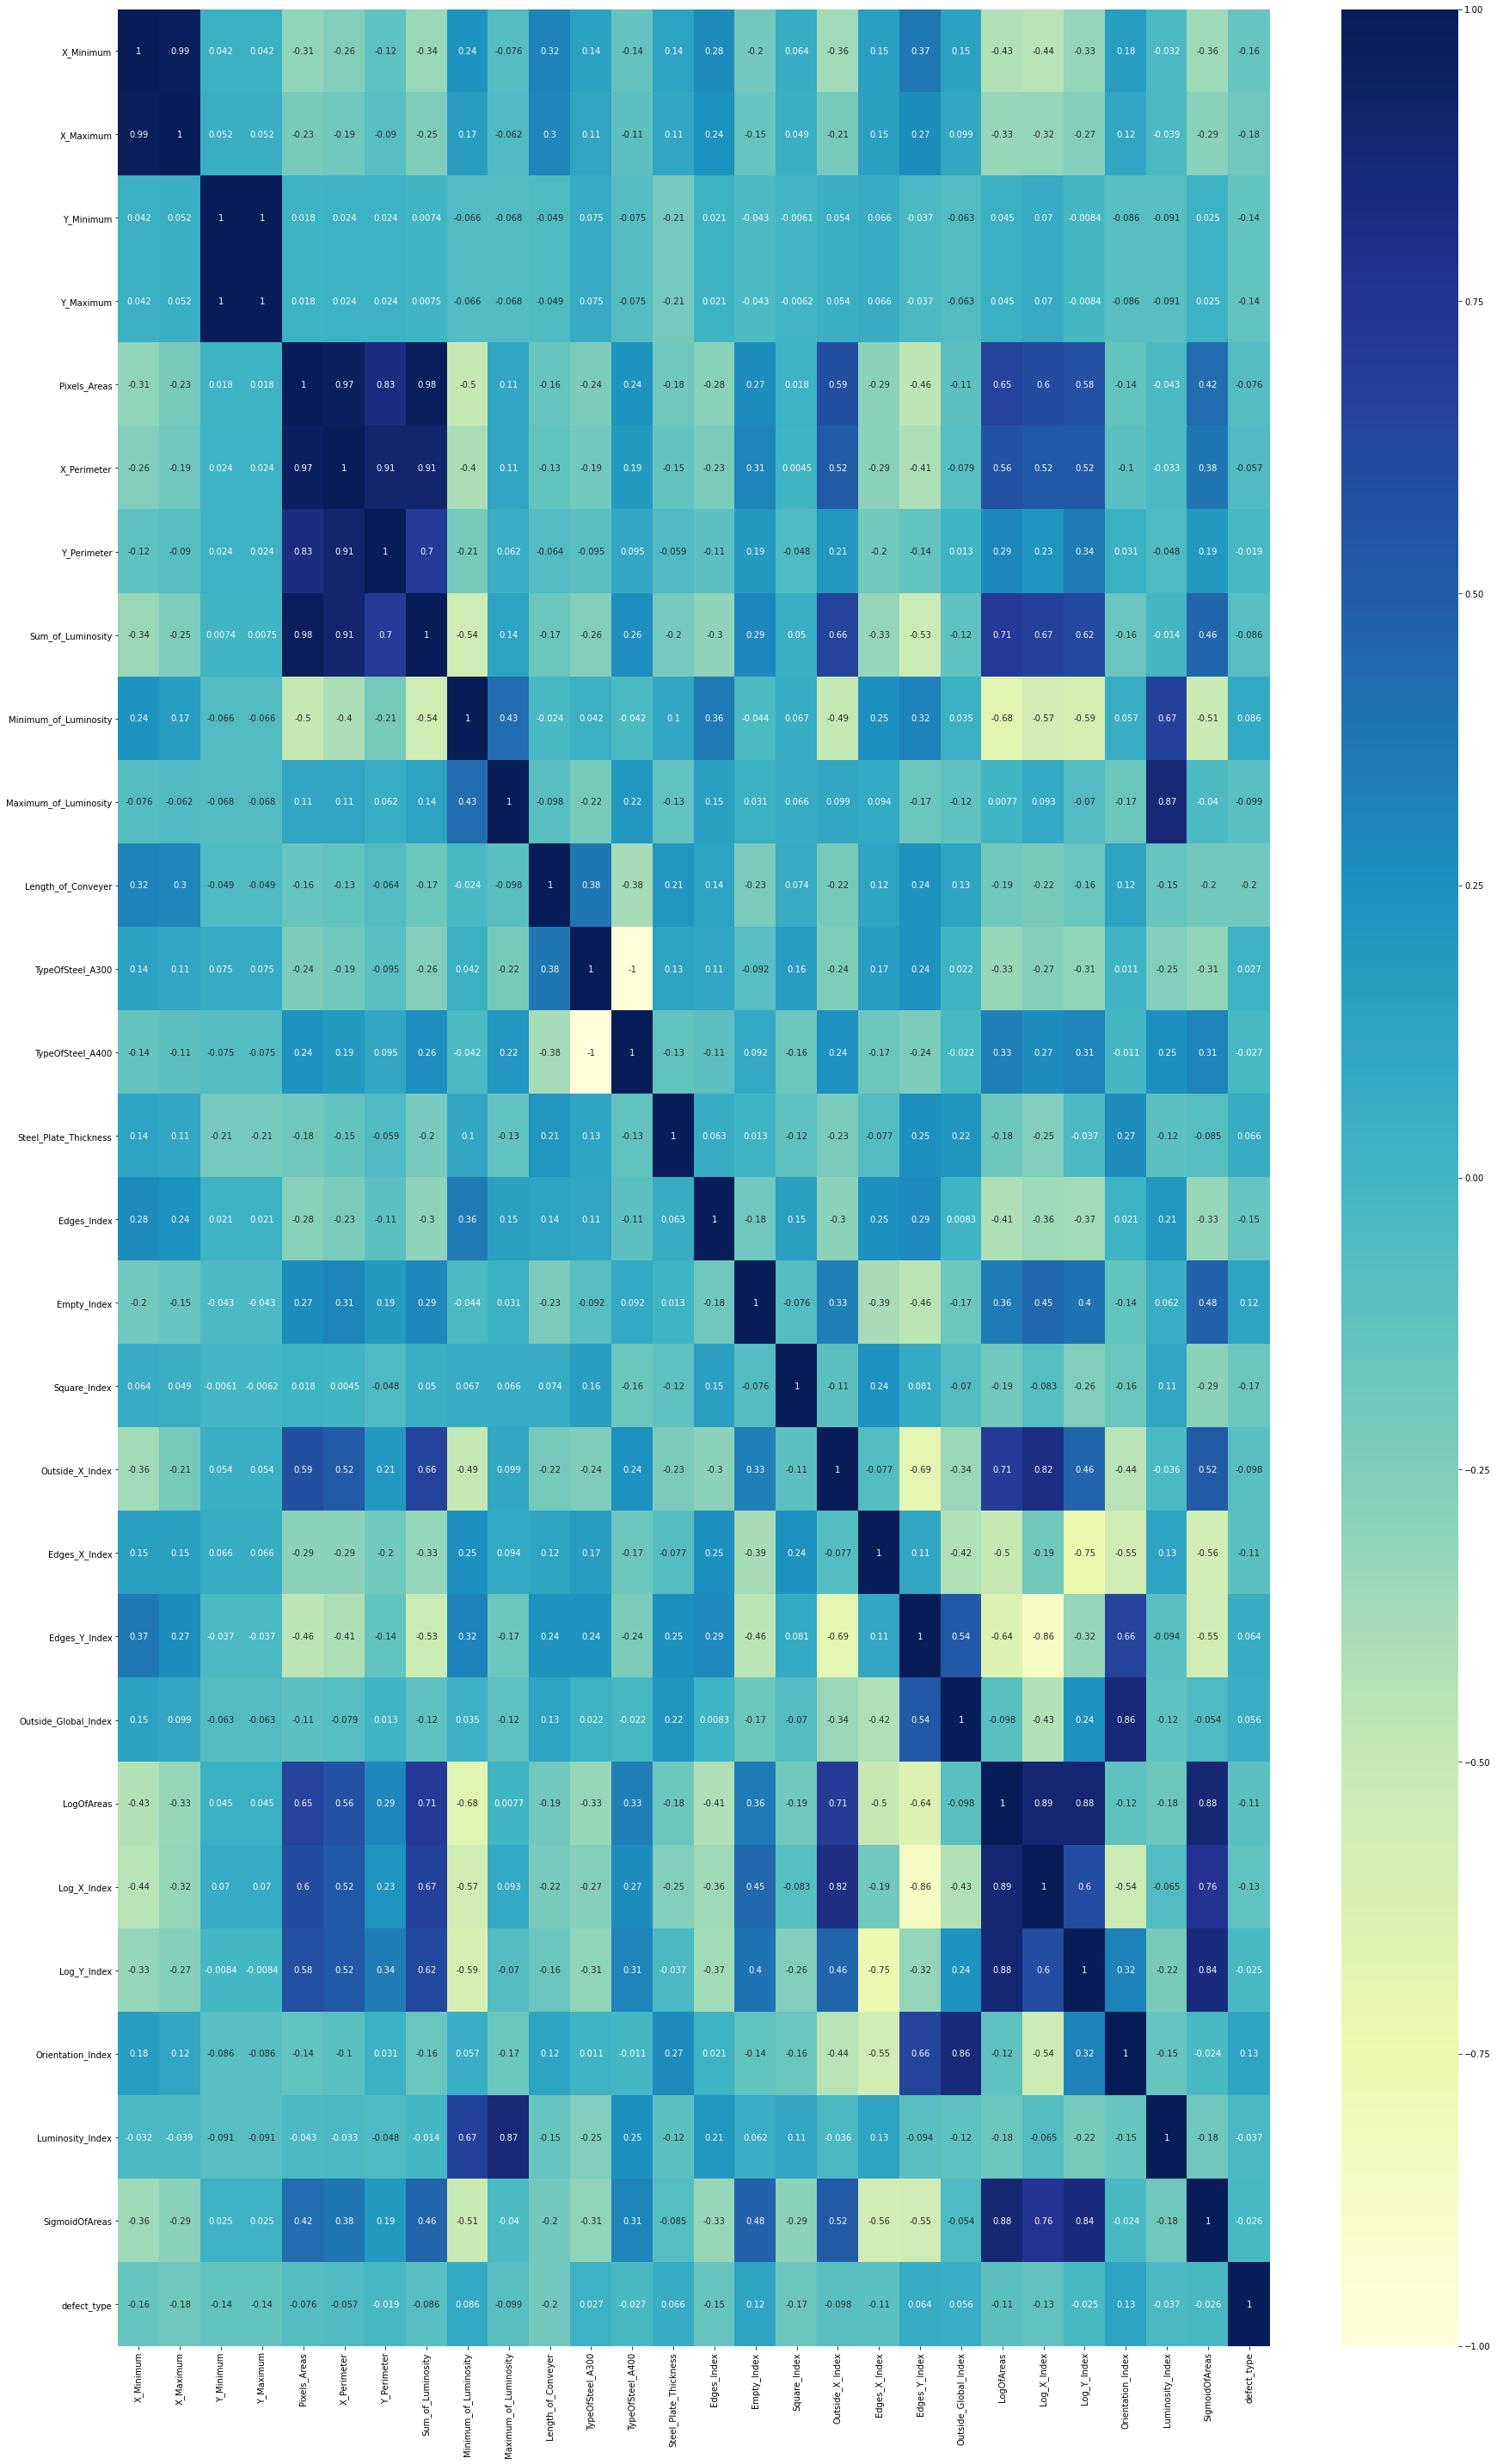

In [95]:
plt.figure(figsize=(30,50))
sns.heatmap(data_new.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [96]:
describe=data_new.describe().T
describe['Skew']= data_new.skew().values
describe['Kurtosis']= data_new.kurt().values
print(data_new['defect_type'].describe())
describe

count    1941.000000
mean        2.569809
std         1.762407
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: defect_type, dtype: float64


,count,mean,std,min,25%,50%,75%,max,Skew,Kurtosis
X_Minimum,1941.0,5.711360e+02,5.206907e+02,0.0000,51.0000,4.350000e+02,1.053000e+03,1.705000e+03,0.500897,-1.145143
X_Maximum,1941.0,6.179645e+02,4.976274e+02,4.0000,192.0000,4.670000e+02,1.072000e+03,1.713000e+03,0.524210,-1.077525
Y_Minimum,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.0000,1.204128e+06,2.183073e+06,1.298766e+07,2.811213,11.357575
Y_Maximum,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.0000,1.204136e+06,2.183084e+06,1.298769e+07,2.811169,11.357194
Pixels_Areas,1941.0,1.893878e+03,5.168460e+03,2.0000,84.0000,1.740000e+02,8.220000e+02,1.526550e+05,14.083822,375.838204
X_Perimeter,1941.0,1.118552e+02,3.012092e+02,2.0000,15.0000,2.600000e+01,8.400000e+01,1.044900e+04,21.539451,715.956548
Y_Perimeter,1941.0,8.296600e+01,4.264829e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04,39.293158,1663.051848
Sum_of_Luminosity,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.0000,1.920200e+04,8.301100e+04,1.159141e+07,7.730720,131.495265
Minimum_of_Luminosity,1941.0,8.454869e+01,3.213428e+01,0.0000,63.0000,9.000000e+01,1.060000e+02,2.030000e+02,-0.107098,0.112370
Maximum_of_Luminosity,1941.0,1.301937e+02,1.869099e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02,1.287035,7.858420


In [97]:
print(data_new['defect_type'].value_counts())


3    673
0    402
2    391
6    190
4    158
5     72
1     55
Name: defect_type, dtype: int64


<AxesSubplot:xlabel='defect_type', ylabel='count'>

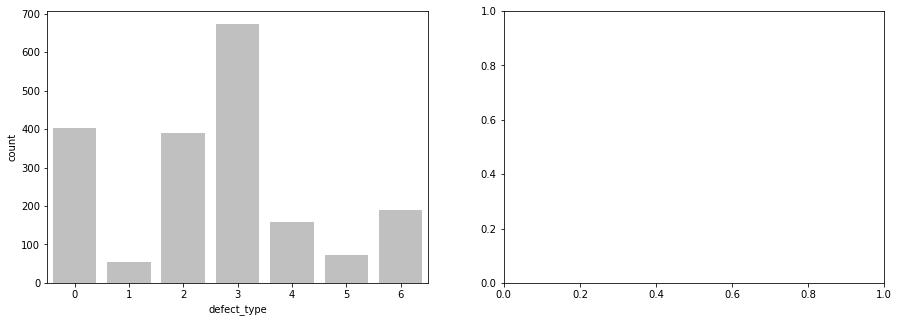

In [98]:
fig, ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='defect_type', data=data_new, ax=ax[0],color='silver')


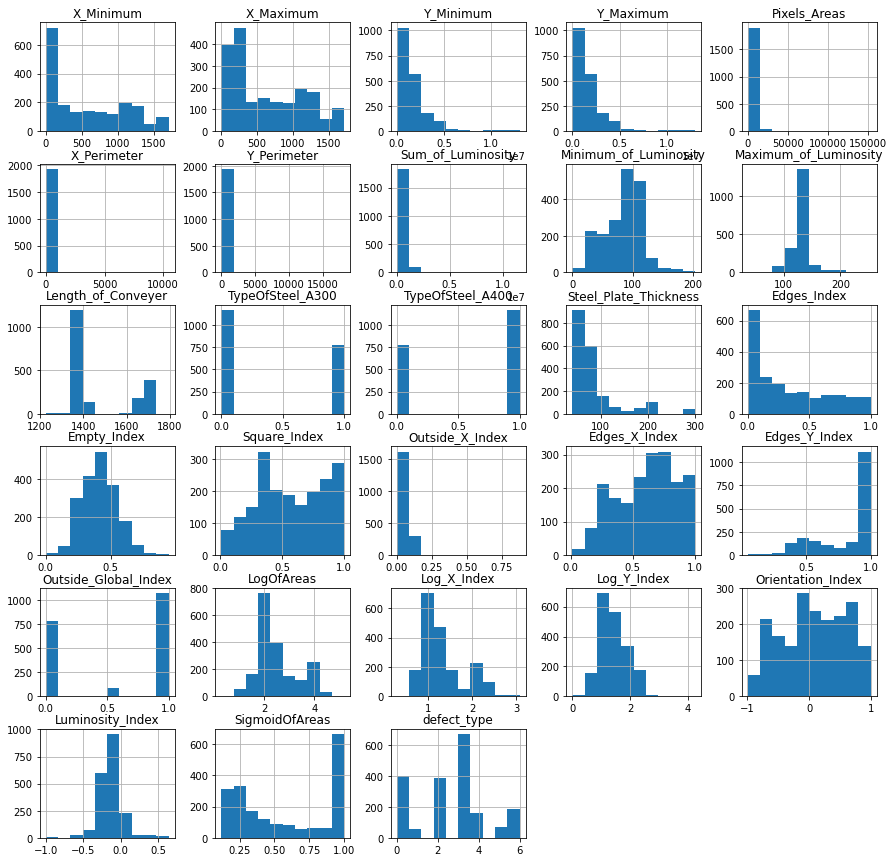

In [99]:
#box plot
data_new.hist(figsize=(15,15))
plt.show()

In [100]:
data_new.columns
data_new.defect_type

0       4
1       4
2       4
3       4
4       4
       ..
1936    3
1937    3
1938    3
1939    3
1940    3
Name: defect_type, Length: 1941, dtype: int32

In [140]:
data_new['defect_type']

0       4
1       4
2       4
3       4
4       4
       ..
1936    3
1937    3
1938    3
1939    3
1940    3
Name: defect_type, Length: 1941, dtype: int32

In [149]:
le=LabelEncoder()
X=data_new.drop('defect_type',axis=1)
Y=le.fit_transform(data_new['defect_type'])
data_new

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,defect_type
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,4
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,4
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,4
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,4
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,3
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,3
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,3
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,3


In [162]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8,random_state=1)

In [163]:
#LR
lr = sm.OLS(y_train,x_train).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     17.04
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           5.79e-67
Time:                        10:00:24   Log-Likelihood:                -2883.9
No. Observations:                1552   AIC:                             5822.
Df Residuals:                    1525   BIC:                             5966.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
X_Minimum                -0.0340      0.017     -1.950      0.051      -0.068       0.000
X_Maximum                 0.0334      0.017      1.917      0.055      -0.001       0.068
Y_Minimum                -0.0054      0.003     -1.780      0.075      -0.011       0.001
Y_Maximum                 0.0054      0.003      1.780      0.075      -0.001       0.011
Pixels_Areas           3.128e-05      0.000      0.190      0.850      -0.000       0.000
X_Perimeter               0.0035      0.002      1.910      0.056   -9.39e-05       0.007
Y_Perimeter              -0.0078      0.004     -2.023      0.043      -0.015      -0.000
Sum_of_Luminosity       4.54e-07   1.44e-06      0.315      0.753   -2.37e-06    3.28e-06
Minimum_of_Luminosity    -0.0027      0.004     -0.771      0.441      -0.010       0.004
Maximum_of_Luminosity    -0.0111      0.005     -2.085      0.037      -0.021      -0.001
Length_of_Conveyer       -0.0029      0.000     -7.316      0.000      -0.004      -0.002
TypeOfSteel_A300         13.2549      1.440      9.208      0.000      10.431      16.079
TypeOfSteel_A400         12.8837      1.413      9.116      0.000      10.111      15.656
Steel_Plate_Thickness     0.0002      0.001      0.299      0.765      -0.001       0.002
Edges_Index              -0.9329      0.151     -6.161      0.000      -1.230      -0.636
Empty_Index               1.0307      1.461      0.706      0.481      -1.835       3.896
Square_Index             -1.1549      0.197     -5.851      0.000      -1.542      -0.768
Outside_X_Index         -47.8266     23.694     -2.018      0.044     -94.304      -1.350
Edges_X_Index             0.0141      0.386      0.037      0.971      -0.744       0.772
Edges_Y_Index            -0.5063      0.521     -0.972      0.331      -1.528       0.516
Outside_Global_Index     -0.4654      0.198     -2.351      0.019      -0.854      -0.077
LogOfAreas               -1.3366      1.693     -0.789      0.430      -4.658       1.985
Log_X_Index               0.3434      1.806      0.190      0.849      -3.200       3.887
Log_Y_Index              -0.5084      1.722     -0.295      0.768      -3.886       2.870
Orientation_Index         1.3031      0.492      2.647      0.008       0.337       2.269
Luminosity_Index          0.8636      0.965      0.895      0.371      -1.029       2.756
SigmoidOfAreas            0.9985      0.370      2.700      0.007       0.273       1.724
==============================================================================
Omnibus:                       35.653   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.875
Skew:                          -0.296   Prob(JB):                     1.20e-07
Kurtosis:                       2.621   Cond. No.                  

In [181]:
data_new
data_new_droped=data_new.drop(['defect_type','X_Maximum','X_Perimeter','Luminosity_Index','Log_Y_Index','Log_X_Index','LogOfAreas','Edges_Y_Index','Edges_X_Index','Empty_Index'
                              ,'Steel_Plate_Thickness','Minimum_of_Luminosity','Sum_of_Luminosity','Pixels_Areas'],axis=1)
X1=data_new_droped
Y1=data_new['defect_type']

In [186]:
X1.columns

Index(['X_Minimum', 'Y_Minimum', 'Y_Maximum', 'Y_Perimeter',
       'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300',
       'TypeOfSteel_A400', 'Edges_Index', 'Square_Index', 'Outside_X_Index',
       'Outside_Global_Index', 'Orientation_Index', 'SigmoidOfAreas'],
      dtype='object')

In [164]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5, p=2 )
clf_fit=knn.fit(x_train, y_train)
# kn_scores=clf_fit.score(x_test, y_test)
y_pred=knn.predict(x_test)


In [165]:
knn.predict(x_test)

array([3, 2, 0, 3, 3, 0, 6, 3, 3, 0, 0, 3, 0, 3, 2, 2, 0, 3, 2, 3, 3, 0,
       0, 0, 3, 2, 2, 0, 3, 3, 0, 2, 2, 2, 3, 0, 6, 3, 3, 3, 3, 0, 0, 2,
       3, 3, 3, 0, 2, 6, 0, 0, 0, 0, 2, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3,
       2, 3, 3, 2, 0, 3, 2, 3, 3, 0, 3, 3, 0, 1, 3, 2, 6, 3, 2, 0, 3, 3,
       2, 0, 0, 3, 3, 1, 2, 3, 0, 3, 0, 0, 0, 2, 3, 0, 3, 3, 3, 2, 3, 3,
       3, 1, 3, 0, 3, 2, 3, 0, 4, 0, 3, 2, 5, 0, 3, 3, 3, 3, 2, 2, 3, 3,
       3, 3, 2, 2, 4, 3, 3, 2, 2, 2, 4, 2, 4, 2, 3, 0, 4, 6, 0, 0, 0, 6,
       0, 3, 3, 0, 2, 3, 3, 2, 3, 3, 6, 2, 2, 0, 0, 2, 3, 0, 3, 0, 0, 3,
       2, 3, 3, 0, 0, 2, 0, 0, 2, 1, 3, 2, 2, 3, 0, 3, 4, 2, 3, 3, 6, 3,
       3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 2, 0, 0, 2, 0,
       6, 0, 3, 0, 3, 0, 0, 6, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 6, 0, 3, 3,
       2, 3, 3, 0, 3, 1, 6, 0, 0, 4, 2, 6, 0, 3, 6, 2, 2, 1, 3, 0, 3, 2,
       3, 5, 3, 0, 3, 0, 3, 2, 3, 2, 6, 2, 2, 0, 1, 3, 3, 3, 3, 0, 3, 0,
       0, 3, 3, 3, 0, 2, 3, 3, 0, 1, 3, 3, 3, 3, 0,

In [166]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))
print('\nclassification_report\n',classification_report(y_test, y_pred))


Accuracy: 0.46786632390745503

classification_report
               precision    recall  f1-score   support

           0       0.32      0.46      0.38        79
           1       0.33      0.40      0.36        10
           2       0.86      0.79      0.82        80
           3       0.47      0.55      0.50       138
           4       0.11      0.03      0.05        29
           5       0.00      0.00      0.00        13
           6       0.12      0.05      0.07        40

    accuracy                           0.47       389
   macro avg       0.32      0.33      0.31       389
weighted avg       0.44      0.47      0.45       389



In [107]:
cross_val_score(knn, X, y, cv=10).mean()

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    score= cross_val_score(knn, X,Y, cv=10)
    
    print('k:',k, ': mean accuracy:', score.mean(),':std:',score.std() )
    

k: 1 : mean accuracy: 0.32254559873116573 :std: 0.06480366069495755
k: 3 : mean accuracy: 0.3792201956119482 :std: 0.0688944310464113
k: 5 : mean accuracy: 0.3998361089082739 :std: 0.06397592489791809
k: 7 : mean accuracy: 0.42609833465503566 :std: 0.06099321933182027
k: 9 : mean accuracy: 0.43280993920169175 :std: 0.06731233321109982
k: 11 : mean accuracy: 0.44569653713983604 :std: 0.07741423773564905
k: 13 : mean accuracy: 0.4410573618821041 :std: 0.07203198936385827
k: 15 : mean accuracy: 0.4374464710547185 :std: 0.06520700040407791
k: 17 : mean accuracy: 0.4379645783769496 :std: 0.06321458019498229
k: 19 : mean accuracy: 0.438995506212001 :std: 0.07543590934990105


In [134]:
#Confusion matrix
confusion_matrix(y_test,y_pred)

array([[36,  3,  0, 36,  2,  0,  4],
       [ 1,  3,  0,  5,  0,  1,  0],
       [ 4,  0, 64,  9,  0,  0,  1],
       [35,  1,  8, 75,  4,  0,  6],
       [12,  0,  3, 22,  1,  0,  2],
       [ 7,  0,  0,  4,  0,  0,  1],
       [16,  1,  3, 17,  1,  1,  0]], dtype=int64)

In [135]:
# random forest
rfc = RandomForestClassifier(n_estimators=30, random_state=68, max_depth = 10)
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
y_pred_train = rfc.predict(x_train)
print('The training accuracy of the model is {}'.format(accuracy_score(y_train,y_pred_train)))
print('The testing accuracy of the model is {}'.format(accuracy_score(y_test,y_pred_rfc)))

The training accuracy of the model is 0.9323453608247423
The testing accuracy of the model is 0.7506426735218509


In [136]:
print(metrics.classification_report(y_test,y_pred_rfc ))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64        81
           1       1.00      0.80      0.89        10
           2       1.00      0.88      0.94        78
           3       0.65      0.82      0.73       129
           4       0.70      0.35      0.47        40
           5       0.79      0.92      0.85        12
           6       0.92      0.85      0.88        39

    accuracy                           0.75       389
   macro avg       0.81      0.75      0.77       389
weighted avg       0.76      0.75      0.75       389



In [137]:
#Confusion matrix
confusion_matrix(y_test,y_pred_rfc)

array([[ 51,   0,   0,  28,   2,   0,   0],
       [  0,   8,   0,   2,   0,   0,   0],
       [  1,   0,  69,   6,   0,   2,   0],
       [ 17,   0,   0, 106,   4,   1,   1],
       [  7,   0,   0,  17,  14,   0,   2],
       [  0,   0,   0,   1,   0,  11,   0],
       [  3,   0,   0,   3,   0,   0,  33]], dtype=int64)

In [182]:
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, train_size = 0.8,random_state=1)

In [183]:
#KNN for selected features
#KNN
knn = KNeighborsClassifier(n_neighbors=5, p=2 )
clf_fit=knn.fit(x_train, y_train)
# kn_scores=clf_fit.score(x_test, y_test)
y_pred=knn.predict(x_test)

In [184]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("Recall:",metrics.recall_score(y_test, y_pred))
print('\nclassification_report\n',classification_report(y_test, y_pred))


Accuracy: 0.2879177377892031

classification_report
               precision    recall  f1-score   support

           0       0.27      0.38      0.32        79
           1       0.00      0.00      0.00        10
           2       0.18      0.19      0.18        80
           3       0.38      0.47      0.42       138
           4       0.29      0.07      0.11        29
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00        40

    accuracy                           0.29       389
   macro avg       0.16      0.16      0.15       389
weighted avg       0.25      0.29      0.26       389



C:\Users\uttej_aei8x\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\uttej_aei8x\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\uttej_aei8x\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
# random forest for selected features
rfc = RandomForestClassifier(n_estimators=30, random_state=68, max_depth = 10)
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
y_pred_train = rfc.predict(x_train)
print('The training accuracy of the model is {}'.format(accuracy_score(y_train,y_pred_train)))
print('The testing accuracy of the model is {}'.format(accuracy_score(y_test,y_pred_rfc)))

The training accuracy of the model is 0.9445876288659794
The testing accuracy of the model is 0.7686375321336761
